<a href="https://colab.research.google.com/github/teshanid/ict607/blob/main/Assignment1_34556573.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labelled_training_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//labelled_testing_data.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//labelled_validation_data.csv')

In [145]:
train_df.isna().any()

timestamp          False
processId          False
threadId           False
parentProcessId    False
userId             False
mountNamespace     False
processName        False
hostName           False
eventId            False
eventName          False
stackAddresses     False
argsNum            False
returnValue        False
args               False
sus                False
evil               False
dtype: bool

<Axes: >

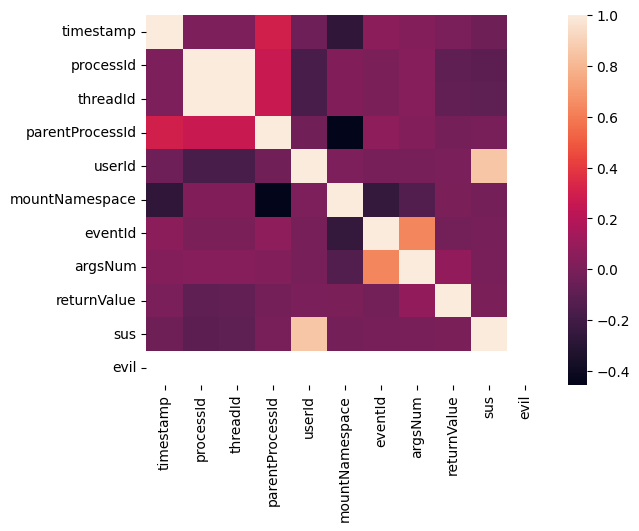

In [146]:
sns.heatmap(train_df.corr(numeric_only= True))

<Axes: >

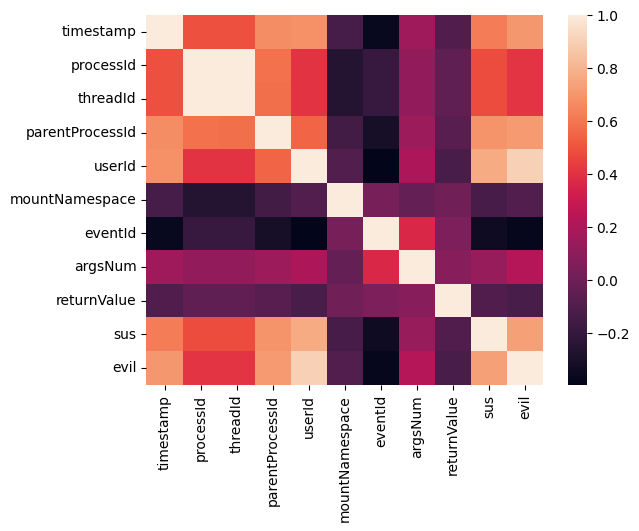

In [147]:
sns.heatmap(test_df.corr(numeric_only= True))

In [148]:
train_df['sus'].value_counts()

sus
0    761875
1      1269
Name: count, dtype: int64

In [149]:
train_df.dtypes

timestamp          float64
processId            int64
threadId             int64
parentProcessId      int64
userId               int64
mountNamespace       int64
processName         object
hostName            object
eventId              int64
eventName           object
stackAddresses      object
argsNum              int64
returnValue          int64
args                object
sus                  int64
evil                 int64
dtype: object

In [150]:
test_df.dtypes

timestamp          float64
processId            int64
threadId             int64
parentProcessId      int64
userId               int64
mountNamespace       int64
processName         object
hostName            object
eventId              int64
eventName           object
stackAddresses      object
argsNum              int64
returnValue          int64
args                object
sus                  int64
evil                 int64
dtype: object

In [151]:
test_df.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [152]:
train_df.duplicated().value_counts()

False    763144
Name: count, dtype: int64

In [153]:
train_df.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0


In [214]:
test_df.describe(include=['object', 'float', 'int'])

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
count,188967.000000,188967.000000,188967.000000,188967.000000,188967.000000,1.889670e+05,188967,188967,188967.000000,188967,188967,188967.000000,188967.000000,188967,188967.000000,188967.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,244,1,NaN,46,4196,NaN,NaN,35177,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,tsm,ip-10-100-1-217,NaN,connect,[],NaN,NaN,"[{'name': 'fd', 'type': 'int', 'value': 3}]",NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,149155,188967,NaN,144981,181438,NaN,NaN,3154,NaN,NaN
mean,455.070015,7347.397202,7347.754089,6919.593490,854.301682,4.026532e+09,NaN,NaN,88.802198,NaN,NaN,2.894569,-66.556991,NaN,0.907349,0.838411
std,61.824198,1109.892047,1108.656349,1972.621259,353.857885,1.811198e+01,NaN,NaN,199.137059,NaN,NaN,0.638079,369.241105,NaN,0.289944,0.368074
min,129.050634,1.000000,1.000000,0.000000,0.000000,4.026532e+09,NaN,NaN,2.000000,NaN,NaN,0.000000,-115.000000,NaN,0.000000,0.000000
25%,461.577225,7555.000000,7555.000000,7548.000000,1001.000000,4.026532e+09,NaN,NaN,42.000000,NaN,NaN,3.000000,-114.000000,NaN,1.000000,1.000000
50%,470.889349,7555.000000,7555.000000,7548.000000,1001.000000,4.026532e+09,NaN,NaN,42.000000,NaN,NaN,3.000000,-114.000000,NaN,1.000000,1.000000
75%,487.116843,7555.000000,7555.000000,7548.000000,1001.000000,4.026532e+09,NaN,NaN,42.000000,NaN,NaN,3.000000,-114.000000,NaN,1.000000,1.000000


In [215]:
train_df=train_df.drop(['timestamp'],axis=1)
test_df=test_df.drop(['timestamp'],axis=1)
train_df['processId'] = train_df['processId'].apply(lambda x: 0 if x>=3 else 1)
train_df['parentProcessId'] = train_df['parentProcessId'].apply(lambda x: 0 if x>=3 else 1)
test_df['processId'] = test_df['processId'].apply(lambda x: 0 if x>=3 else 1)
test_df['parentProcessId'] = test_df['parentProcessId'].apply(lambda x: 0 if x>=3 else 1)
train_df['mountNamespace'] = train_df['mountNamespace'].apply(lambda x: 1 if x==4026531840 else 0)
test_df['mountNamespace'] = test_df['mountNamespace'].apply(lambda x: 1 if x==4026531840 else 0)

In [216]:
def condition(x):
    if x>0:
        return 1
    elif x<0:
        return -1
    else:
        return 0


train_df['returnValue'] = train_df['returnValue'].apply(condition)
test_df['returnValue'] = test_df['returnValue'].apply(condition)

In [217]:
X_train = train_df[["processId", "parentProcessId", "userId", "mountNamespace", "eventId", "argsNum", "returnValue"]]
y_train =  train_df["sus"]
X_test = test_df[["processId", "parentProcessId", "userId", "mountNamespace", "eventId", "argsNum", "returnValue"]]
y_test =  test_df["sus"]

In [219]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(763144, 7) (188967, 7)
(763144,) (188967,)


In [220]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [221]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        units=8,
        activation="relu",
        input_dim=X_train.shape[1]
    ), # 1st hidden layer (or, 2nd layer because 1st layer is the input layer)

    tf.keras.layers.Dense(
        units=5,
        activation="softmax"
    ) # output layer
])

In [222]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [223]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [224]:
classify_history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test,y_test)
)

Epoch 1/5
23849/23849 [==============================] - 64s 3ms/step - loss: 0.4650 - accuracy: 0.9957 - val_loss: 2.4213 - val_accuracy: 0.9338
Epoch 2/5
23849/23849 [==============================] - 57s 2ms/step - loss: 0.0102 - accuracy: 0.9994 - val_loss: 0.6486 - val_accuracy: 0.9460
Epoch 3/5
23849/23849 [==============================] - 60s 3ms/step - loss: 0.0089 - accuracy: 0.9995 - val_loss: 0.8024 - val_accuracy: 0.9460
Epoch 4/5
23849/23849 [==============================] - 77s 3ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.6708 - val_accuracy: 0.9460
Epoch 5/5
23849/23849 [==============================] - 79s 3ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.5336 - val_accuracy: 0.9460


In [225]:
history_dict = classify_history.history

In [226]:
history_dict

{'loss': [0.46503958106040955,
  0.010171295143663883,
  0.008934342302381992,
  0.007528615649789572,
  0.006702863611280918],
 'accuracy': [0.9957347512245178,
  0.999409019947052,
  0.9995125532150269,
  0.999554455280304,
  0.9995741248130798],
 'val_loss': [2.421255588531494,
  0.6486191749572754,
  0.8023839592933655,
  0.670754075050354,
  0.5336227416992188],
 'val_accuracy': [0.933845579624176,
  0.9459800124168396,
  0.9459800124168396,
  0.9459800124168396,
  0.9459800124168396]}

In [227]:
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1,len(train_loss)+1)

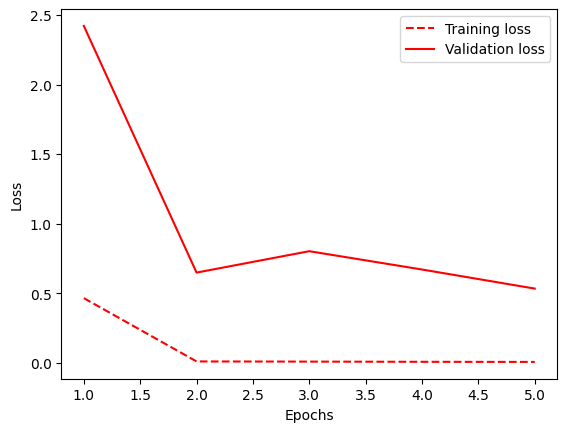

In [228]:
plt.plot(epochs,train_loss,'r--',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

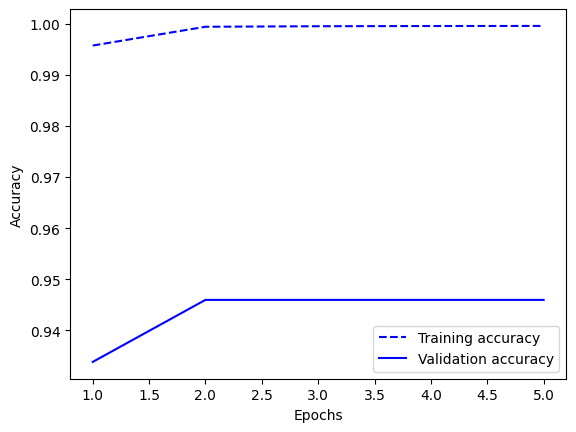

In [229]:
plt.plot(epochs,train_acc,'b--',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#Evaluation

In [230]:
from sklearn.metrics import accuracy_score

In [231]:
test_pred = model.predict(X_test)

5906/5906 [==============================] - 12s 2ms/step


In [232]:
test_pred

array([[9.9806124e-01, 1.9387105e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [9.9821341e-01, 1.7866113e-03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [9.9999994e-01, 1.5131502e-12, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [1.9934446e-32, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.9934446e-32, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.9934446e-32, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [233]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
188962    1
188963    1
188964    1
188965    1
188966    1
Name: sus, Length: 188967, dtype: int64

In [234]:
y_pred = np.argmax(test_pred, axis=1)

In [235]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [236]:
test_acc = accuracy_score(y_test, y_pred)

In [237]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9459799859234681


#Confusion Matrix

In [243]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [245]:
print(conf_matrix.shape)
print(len(class_names))

(2, 2)
5


In [239]:
class_names = ['dos', 'normal', 'probe', 'r2l', 'u2r'] # same sequence as in amap variable in load_KDD1999.ipynb

In [252]:
conf_matrix = confusion_matrix(y_test, y_pred)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).

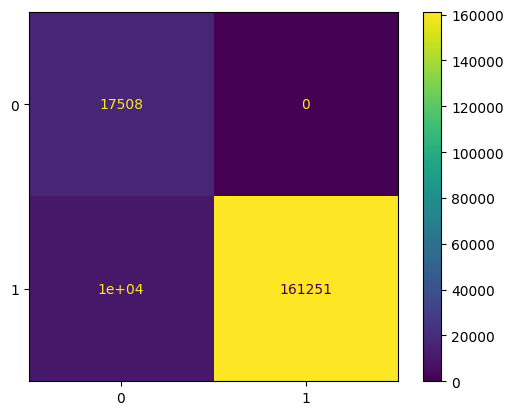

In [251]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).

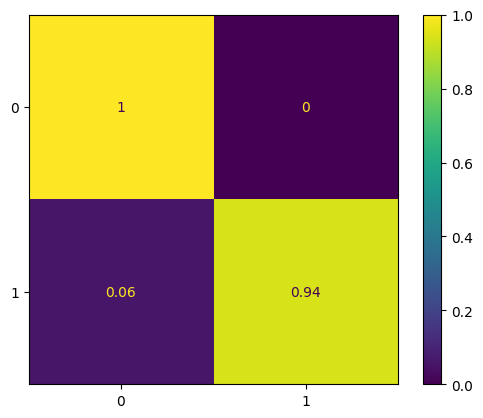

In [247]:
conf_matrix = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot()

#F1 Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred, average='macro')

In [253]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     17508
           1       1.00      0.94      0.97    171459

    accuracy                           0.95    188967
   macro avg       0.82      0.97      0.87    188967
weighted avg       0.97      0.95      0.95    188967



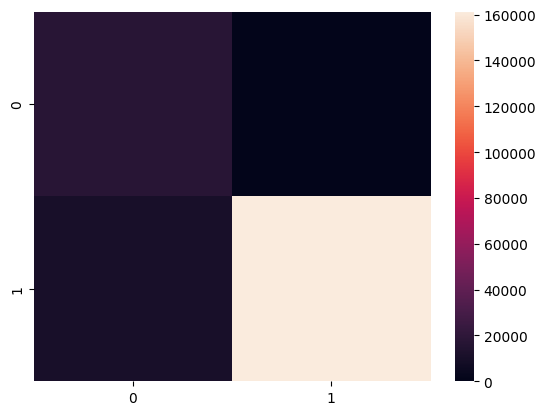

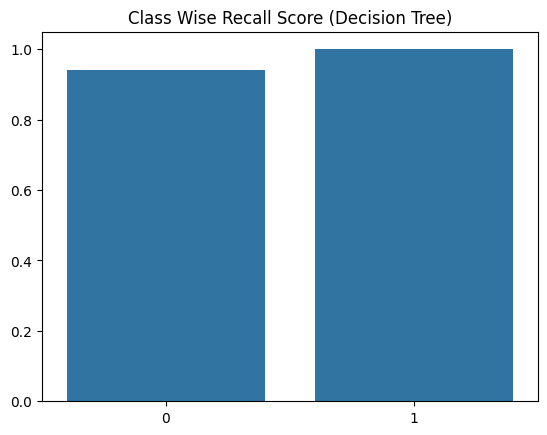

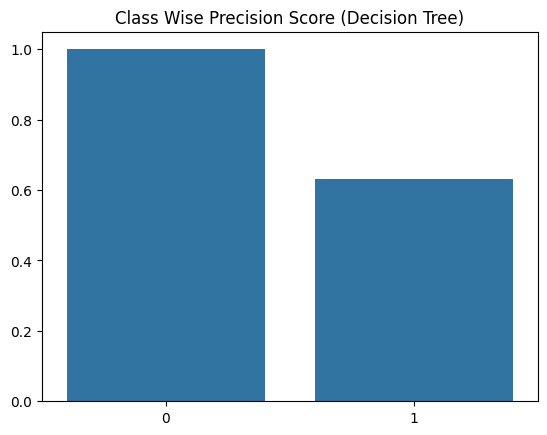

In [254]:
y_pred = DTC_Classifier.predict(X_test)

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix)
plt.show()

sns.barplot(x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (Decision Tree)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (Decision Tree)")
plt.show()

In [255]:
from sklearn.svm import SVC

In [256]:
clf = SVC()
clf.fit( X_train , y_train )

SVC()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    228572
           1       1.00      0.81      0.90       372

    accuracy                           1.00    228944
   macro avg       1.00      0.91      0.95    228944
weighted avg       1.00      1.00      1.00    228944



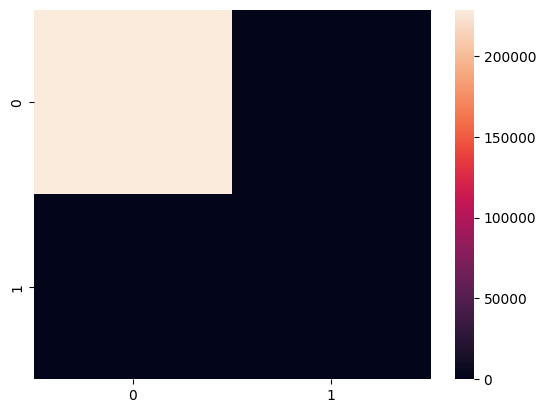

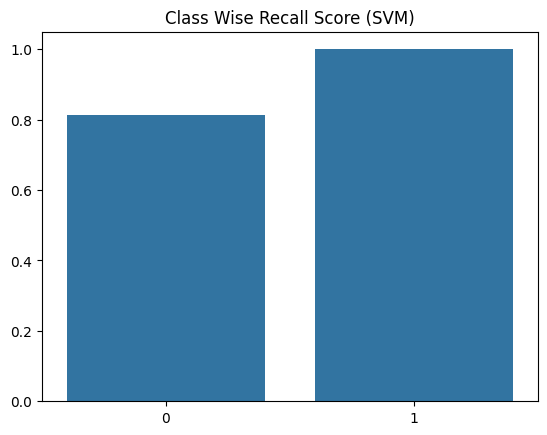

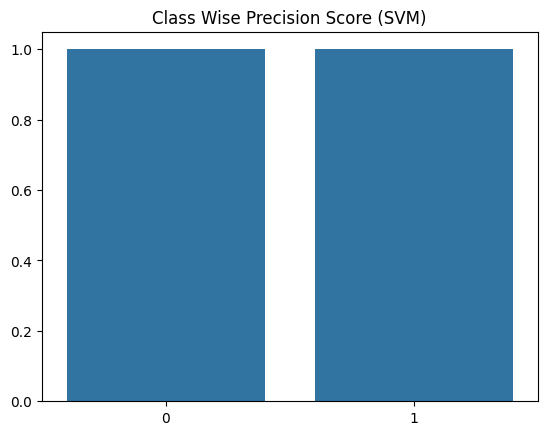

In [141]:
y_pred = clf.predict( X_test )

print( classification_report( y_test , y_pred ) )

matrix = confusion_matrix( y_test , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (SVM)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (SVM)")
plt.show()